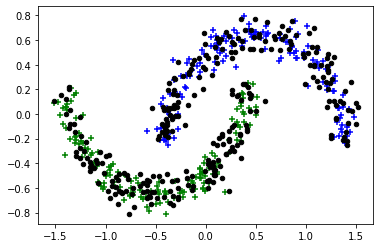

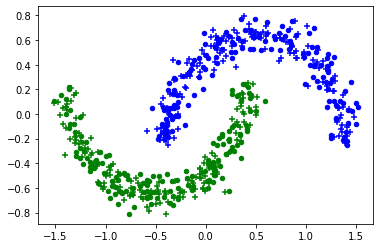

In [1]:

import matplotlib.pyplot as plt
import random
from math import sqrt
from math import cos
from math import sin

CLUST_N = 2
POINT_N = 300
KNBR_N = 5

def DataClouds (A, N):
	for i in range(0, N):
		if random.random() < 0.5:
			A[i].clust = 0
			A[i].X = random.normalvariate(-1.0, 0.5)
			A[i].Y = random.normalvariate(0.0, 0.2)
		else:
			A[i].clust = 1
			A[i].X = random.normalvariate(1.0, 0.2)
			A[i].Y = random.normalvariate(0.0, 0.75)
	return

def DataMoons (A, N):
	for i in range(0, N):
		f = 3.14 * random.random()
		r = 0.2 * random.normalvariate(0.0, 0.4) + 0.9
		if random.random() < 0.5:
			A[i].clust = 0
			A[i].X = 0.5 + r * cos(f)
			A[i].Y = -0.25 + r * sin(f)
		else:
			A[i].clust = 1
			A[i].X = -0.5 + r * cos(f)
			A[i].Y = 0.25 - r * sin(f)
	return

class POINT:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.Kn = [0 for i in range(0, KNBR_N)]
        self.clust = 0
    def Neighbors(self, A):
        l = [i for i  in range(0, len(A))]
        for k in range(0, KNBR_N):
            n = -1
            d = 1.0e+99
            for i in l:
                if d > (self.X-A[i].X)**2 + (self.Y-A[i].Y)**2:
                    n = i
                    d = (self.X-A[i].X)**2 + (self.Y-A[i].Y)**2
            self.Kn[k] = n
            l.remove(n)


PPtrn = [POINT(0.0, 0.0) for i in range(0, POINT_N)]
#DataClouds(PPtrn, POINT_N)
DataMoons(PPtrn, POINT_N)

PPtst = [POINT(0.0, 0.0) for i in range(0, POINT_N)]
#DataClouds(PPtst, POINT_N)
DataMoons(PPtst, POINT_N)

for p in PPtrn:
    if p.clust == 0:
        plt.scatter(p.X, p.Y, c='blue', marker="+")
    else:
        plt.scatter(p.X, p.Y, c='green', marker="+")
for p in PPtst:
    if p.clust == 0:
        plt.scatter(p.X, p.Y, s=20, c='black')
    else:
        plt.scatter(p.X, p.Y, s=20, c='black')
plt.show()

for p in PPtrn:
    if p.clust == 0:
        plt.scatter(p.X, p.Y, c='blue', marker="+")
    else:
        plt.scatter(p.X, p.Y, c='green', marker="+")

for p in PPtst:
    p.Neighbors(PPtrn)
    cl = [0 for i in range(0, CLUST_N)]
    for k in range(0, KNBR_N):
        cl[PPtrn[p.Kn[k]].clust] += 1
    n = 0
    c = cl[n]
    for k in range(1, CLUST_N):
        if cl[k] > c:
            c = cl[k]
            n = k
    p.clust = n
    if p.clust == 0:
        plt.scatter(p.X, p.Y, s=20.0, c='blue')
    else:
        plt.scatter(p.X, p.Y, s=20.0, c='green')
plt.show()
